# Load Data and Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/content/data.csv')

# Inspect basic information
print(df.info())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Route of Travel  132 non-null    object 
 1   Year             132 non-null    int64  
 2   Statistic Label  132 non-null    object 
 3   UNIT             132 non-null    object 
 4   VALUE            132 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB
None


,Year,VALUE
count,132.000000,132.000000
mean,2014.000000,2559.995455
std,3.174324,2812.963720
min,2009.000000,4.700000
25%,2011.000000,9.400000
50%,2014.000000,2038.500000
75%,2017.000000,3978.500000
max,2019.000000,10808.000000


# Data Visualizations:

Time Series Analysis of tourism metrics over the years.
Bar Plot of trip count or stay length by route or year.

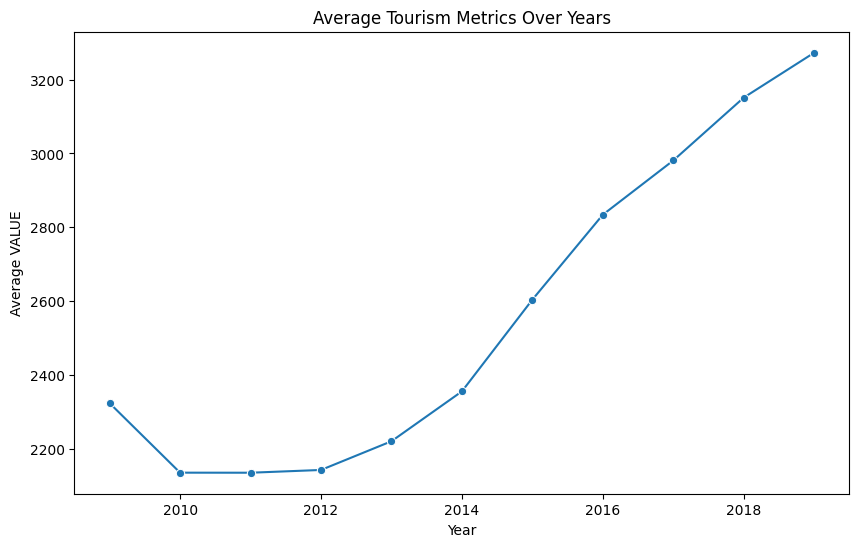

In [6]:
# Average trips over the years
yearly_summary = df.groupby('Year')['VALUE'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_summary.index, y=yearly_summary.values, marker="o")
plt.title("Average Tourism Metrics Over Years")
plt.xlabel("Year")
plt.ylabel("Average VALUE")
plt.show()


Correlation Matrix to find potential relationships among numerical features.

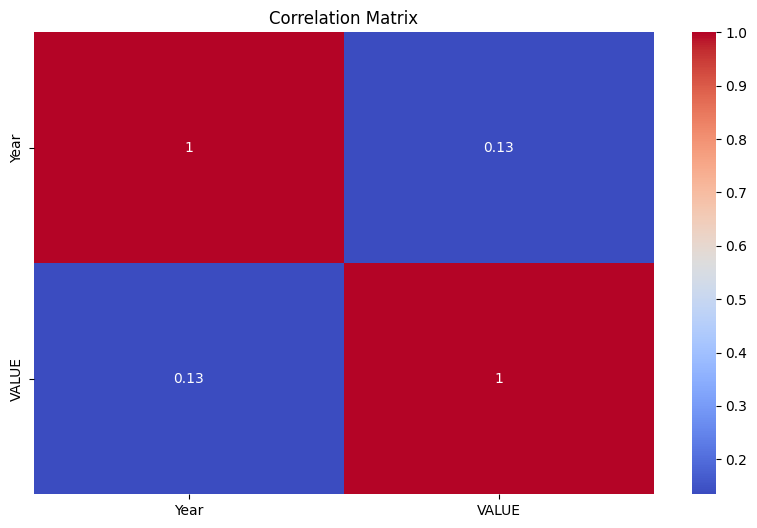

In [7]:
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Discrete Distributions

**Poisson Distribution:**
Daily visitor counts

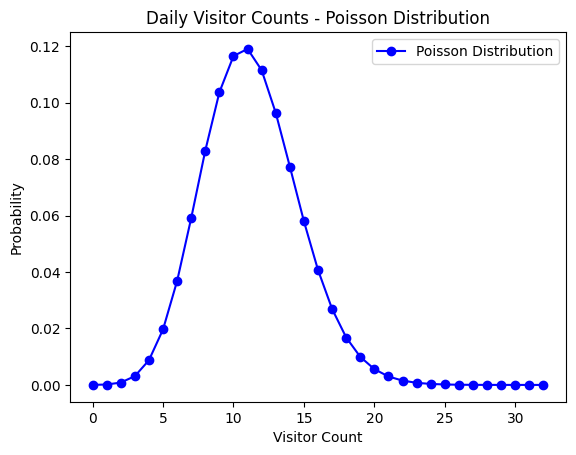

In [8]:
from scipy.stats import poisson
import numpy as np

# Average daily visitors
avg_yearly_trips = df[df['Statistic Label'] == 'Overseas Trips to Ireland by Non-Residents']['VALUE'].mean()
days_in_year = 365
daily_avg_visitors = avg_yearly_trips / days_in_year

# Poisson probability plot
visitor_counts = np.arange(0, int(daily_avg_visitors * 3))
poisson_probs = poisson.pmf(visitor_counts, daily_avg_visitors)

plt.plot(visitor_counts, poisson_probs, 'bo-', label="Poisson Distribution")
plt.title("Daily Visitor Counts - Poisson Distribution")
plt.xlabel("Visitor Count")
plt.ylabel("Probability")
plt.legend()
plt.show()


**Binomial Distribution:**
The likelihood of visitors engaging in multiple activities on a trip.

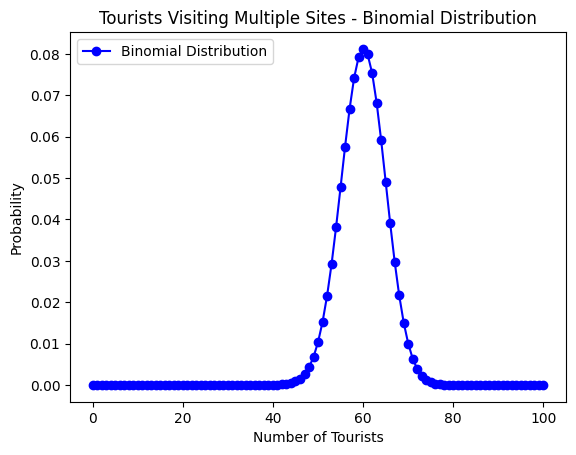

In [9]:
from scipy.stats import binom

n = 100  # Number of trials (e.g., 100 visitors)
p = 0.6  # Probability of visiting multiple sites
binom_values = binom.pmf(range(n + 1), n, p)

plt.plot(range(n + 1), binom_values, 'bo-', label="Binomial Distribution")
plt.title("Tourists Visiting Multiple Sites - Binomial Distribution")
plt.xlabel("Number of Tourists")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Normal Distribution for Continuous Variable
Average Length of Stay

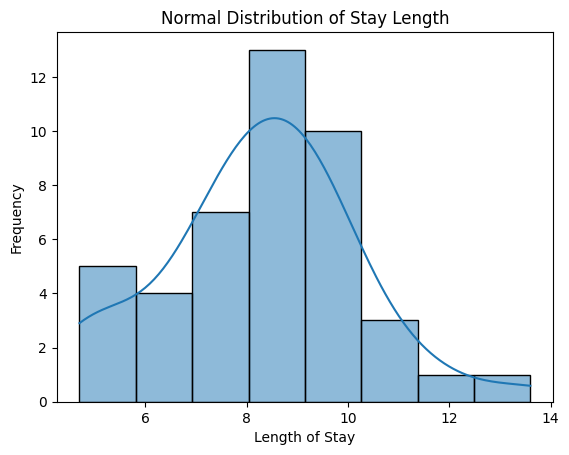

In [10]:
from scipy.stats import norm

# Select the data
stay_data = df[df['Statistic Label'] == 'Average Length of Stay by Irish Residents on Overseas Trips']['VALUE']
stay_mean = stay_data.mean()
stay_std = stay_data.std()

# Plot Normal Distribution
sns.histplot(stay_data, kde=True)
plt.title("Normal Distribution of Stay Length")
plt.xlabel("Length of Stay")
plt.ylabel("Frequency")
plt.show()


# Machine Learning Data Preparation & Model Selection

**Preprocessing:**

Scaling, Encoding categorical features, and Handling Missing Values.

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Label Encoding categorical columns
df['Route of Travel'] = LabelEncoder().fit_transform(df['Route of Travel'])
df['Statistic Label'] = LabelEncoder().fit_transform(df['Statistic Label'])
df['UNIT'] = LabelEncoder().fit_transform(df['UNIT'])

# Scaling
scaler = StandardScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df)
# Train-test split
X = df.drop(['VALUE'], axis=1)
y = df['VALUE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


     Route of Travel  Year  Statistic Label  UNIT     VALUE
0                  0  2009                2     1  1.551234
1                  0  2009                1     1  1.591915
2                  0  2009                0     0 -0.910647
3                  0  2010                2     1  1.277172
4                  0  2010                1     1  1.463092
..               ...   ...              ...   ...       ...
127                3  2018                1     1 -0.637692
128                3  2018                0     0 -0.909933
129                3  2019                2     1 -0.203760
130                3  2019                1     1 -0.620920
131                3  2019                0     0 -0.910112

[132 rows x 5 columns]


**Model Selection:**

Using Random Forest and K-Nearest Neighbors (KNN) as supervised models with GridSearch hyperparameter tuning .

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearch
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
knn_params = {'n_neighbors': [3, 5, 7]}

rf_grid = GridSearchCV(rf, rf_params, cv=5)
knn_grid = GridSearchCV(knn, knn_params, cv=5)

rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

# Model comparison
rf_best = rf_grid.best_estimator_
knn_best = knn_grid.best_estimator_

rf_score = rf_best.score(X_test, y_test)
knn_score = knn_best.score(X_test, y_test)

print("Random Forest Score:", rf_score)
print("KNN Score:", knn_score)


Random Forest Score: 0.9783326381401491
KNN Score: 0.8665933885064211


**Model Performance Evaluation:**

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model prediction
rf_pred = rf_best.predict(X_test)
knn_pred = knn_best.predict(X_test)

# Calculate MSE, MAE, and R-squared for Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest:")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")

# Calculate MSE, MAE, and R-squared for KNN
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("\nKNN:")
print(f"MSE: {knn_mse}")
print(f"MAE: {knn_mae}")
print(f"R-squared: {knn_r2}")

Random Forest:
MSE: 0.028534710700163397
MAE: 0.10257375205219174
R-squared: 0.9783326381401491

KNN:
MSE: 0.1756890889200556
MAE: 0.2750383204225465
R-squared: 0.8665933885064211


In [18]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN'],
    'Score': [rf_score, knn_score]
})
display(results)


,Model,Score
0,Random Forest,0.978176
1,KNN,0.866593


**Visual Evaluation of models**

                      Model     Metric     Score
0  Random Forest Classifier   Accuracy  0.978176
1           K Neighbors KNN  KNN Score  0.866593


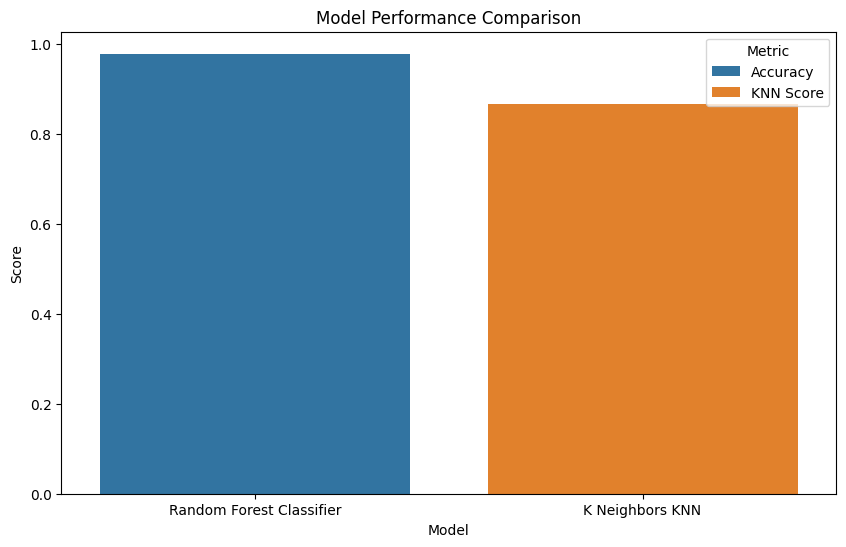

In [24]:
# Display Results Comparison
results = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'K Neighbors KNN'],
    'Metric': ['Accuracy', 'KNN Score'],
    'Score': [rf_score, knn_score]
})
print(results)

# Visualization of comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=results, hue='Metric', dodge=False)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()
